<a href="https://colab.research.google.com/github/Urvashi80/Sales_data-Processing/blob/main/sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# --- 1. Connect to the Database ---
# The connection is made to the file created in Part 1.
conn = sqlite3.connect("sales_data.db")
print("Connected to sales_data.db successfully.")

Connected to sales_data.db successfully.


In [11]:
# --- 2. Define the SQL Query ---
# This query groups by product and calculates total quantity and total revenue (quantity * price).
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY
    product
ORDER BY
    revenue DESC;
"""

In [12]:
# Load the sales data from CSV into a DataFrame
sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sales_data.csv")

# Write the DataFrame to the SQLite database
# The table will be named 'sales' as per the query in the error cell
sales_df.to_sql('sales', conn, if_exists='replace', index=False)

print("Sales data loaded into 'sales' table in sales_data.db")

Sales data loaded into 'sales' table in sales_data.db


In [13]:
# --- 3. Load into Pandas DataFrame ---
# pd.read_sql_query handles the execution and data retrieval.
df = pd.read_sql_query(query, conn)

In [14]:
# Close the database connection once data is loaded
conn.close()


In [15]:
# --- 5. Plot Simple Bar Chart ---
print("\nGenerating bar chart: sales_chart.png")


Generating bar chart: sales_chart.png


<Axes: xlabel='product'>

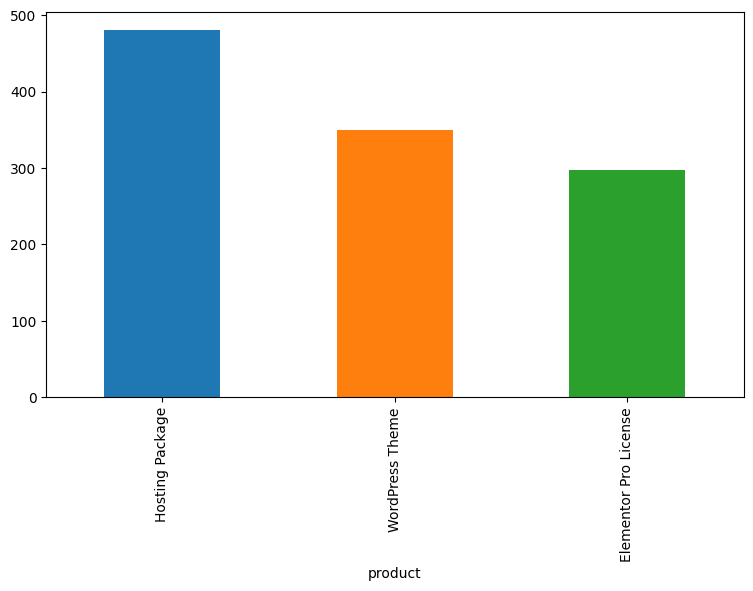

In [16]:
# Use Pandas plotting functionality (which uses Matplotlib)
plt.figure(figsize=(9, 5))
df.plot(
    kind='bar',
    x='product',
    y='revenue',
    legend=False,
    ax=plt.gca(),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'] # Custom colors for clarity
)

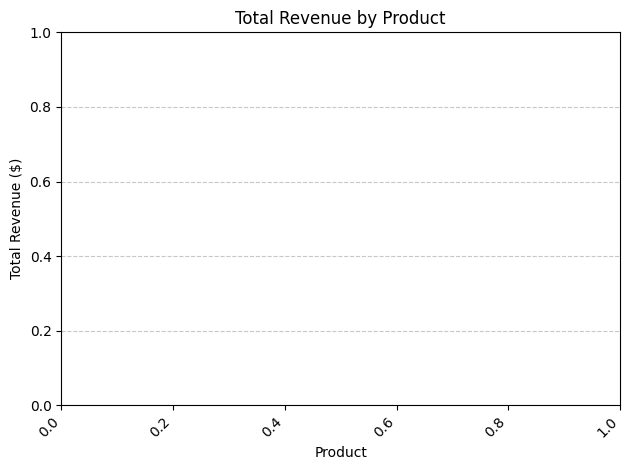

In [20]:
# Add chart labels and rotation
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [21]:
# Save and Show the chart
plt.savefig("sales_chart.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [22]:
print("Analysis Complete.")

Analysis Complete.


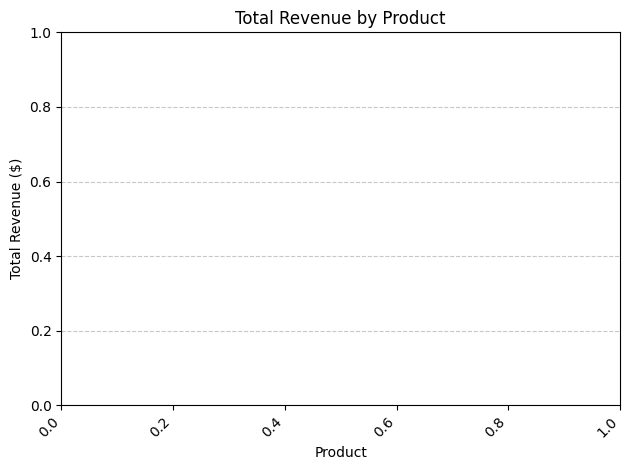

In [23]:
# Add chart labels and rotation
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and Show the chart
plt.savefig("sales_chart.png")
plt.show()